In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib

In [2]:
def preprocess(df):
    df['MKL'] = df['MKL'] == 'on'
    df['InnerABC'] = df['InnerABC'] == 'on'
    
    df['nodes'] = df['nodes'].astype(int)
    df['c'] = df['c'].astype(int)
    
    df.drop(df[df['time'] == 'oom'].index, inplace=True)
    df['time'] = df['time'].astype(float)

In [3]:
s_50000_1000_5 = pd.read_csv('50000_1000_5.csv')
s_100000_100_2 = pd.read_csv('100000_100_2.csv')
s_50000_1000_weak = pd.read_csv('50000_1000_weak.csv')

preprocess(s_50000_1000_5)
preprocess(s_100000_100_2)
preprocess(s_50000_1000_weak)

/home/tomek/.virtualenvs/logika/lib/python3.7/site-packages/pandas/core/ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [4]:
def draw_plot(df, mkl, inner, maxy, name):
    cs = df['c'].unique()
    nodes = df['nodes'].unique()
    
    yticks = [maxy // (2**i) for i in range(4, -1, -1)]
    
    filename = name
    if inner:
        filename += "_i"
    if mkl:
        filename += "_m"
    filename += ".png"
    
    fig, ax = plt.subplots(figsize=(6,4))
    
    for c in cs:
        sdf = df[(df['c'] == c) & (df['MKL'] == mkl) & (df['InnerABC'] == inner)]
        ax.plot('nodes', 'time', data=sdf, label=f"c = {c}", marker='x', linestyle='dashed', linewidth=1, markersize=8)
        ax.legend()
        
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_xlabel('nodes')
    ax.set_ylabel('time[s]')
    ax.set_xticks(nodes)
    ax.set_yticks(yticks)
        
    ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
    ax.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
    
    fig.savefig(filename, dpi=300)
    
    plt.show()

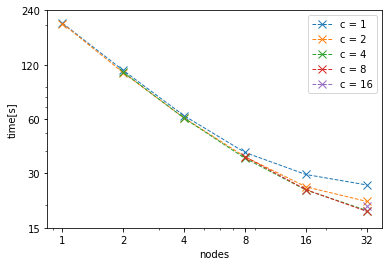

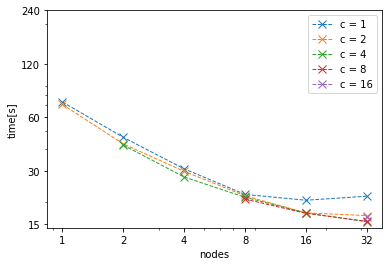

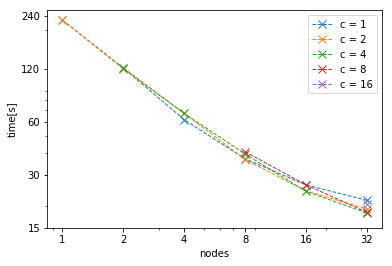

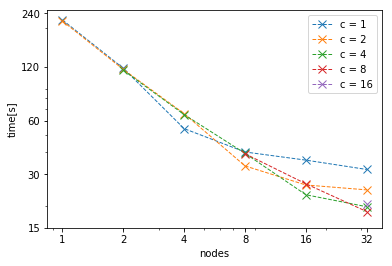

In [5]:
draw_plot(s_50000_1000_5, True, True, 240, 's_50000_1000_5')
draw_plot(s_50000_1000_5, True, False, 240, 's_50000_1000_5')
draw_plot(s_50000_1000_5, False, True, 240, 's_50000_1000_5')
draw_plot(s_50000_1000_5, False, False, 240, 's_50000_1000_5')

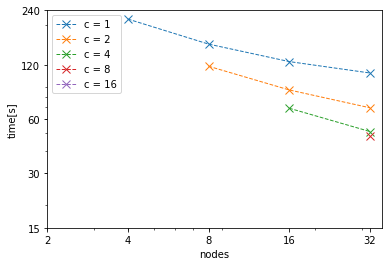

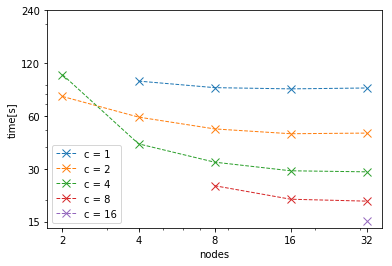

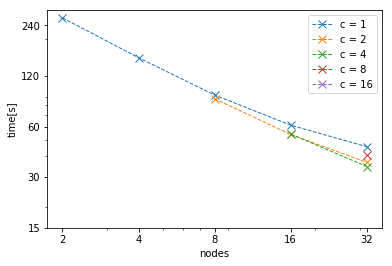

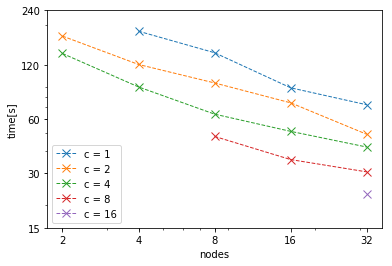

In [6]:
draw_plot(s_100000_100_2, True, True, 240, 's_100000_100_2')
draw_plot(s_100000_100_2, True, False, 240, 's_100000_100_2')
draw_plot(s_100000_100_2, False, True, 240, 's_100000_100_2')
draw_plot(s_100000_100_2, False, False, 240, 's_100000_100_2')

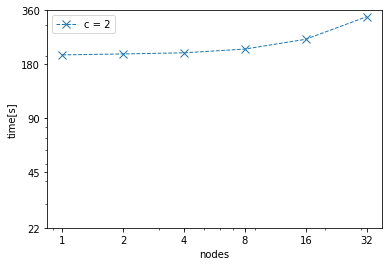

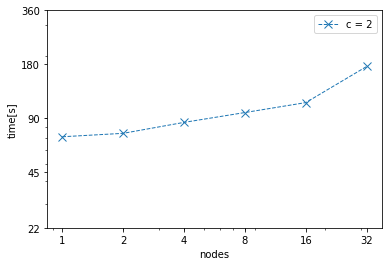

In [7]:
draw_plot(s_50000_1000_weak, True, True, 360, 's_50000_1000_weak')
draw_plot(s_50000_1000_weak, True, False, 360, 's_50000_1000_weak')